<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
from google.colab import drive
drive.mount ('/content/gdrive/',force_remount=True) # монтируем свой GoogleDisc к виртуальной машине

Mounted at /content/gdrive/


In [4]:
data = pd.read_csv('/content/gdrive/MyDrive/hw_ML_task/train.csv')

In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [6]:
data.shape

(5282, 20)

In [7]:
# YOUR CODE 
data.sample(10) #Посмотрим на случайные 10 строчек

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3266,1,71.00,71,Female,1,No,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
3490,1,49.00,49,Male,0,No,No,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,No,Credit card (automatic),0
3165,10,80.70,788.8,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),1
3121,59,106.15,6256.2,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,0
4277,15,18.80,294.95,Male,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
3268,66,19.35,1240.8,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0
729,2,62.15,113.1,Female,0,Yes,No,Yes,No,DSL,Yes,No,No,No,No,Yes,Month-to-month,Yes,Mailed check,0
3013,65,104.25,6812.95,Male,0,Yes,No,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,0
5036,34,105.35,3540.65,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,0
1897,1,90.75,90.75,Male,0,Yes,No,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [9]:
# Построим табличку с количеством nan в каждой колонке
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

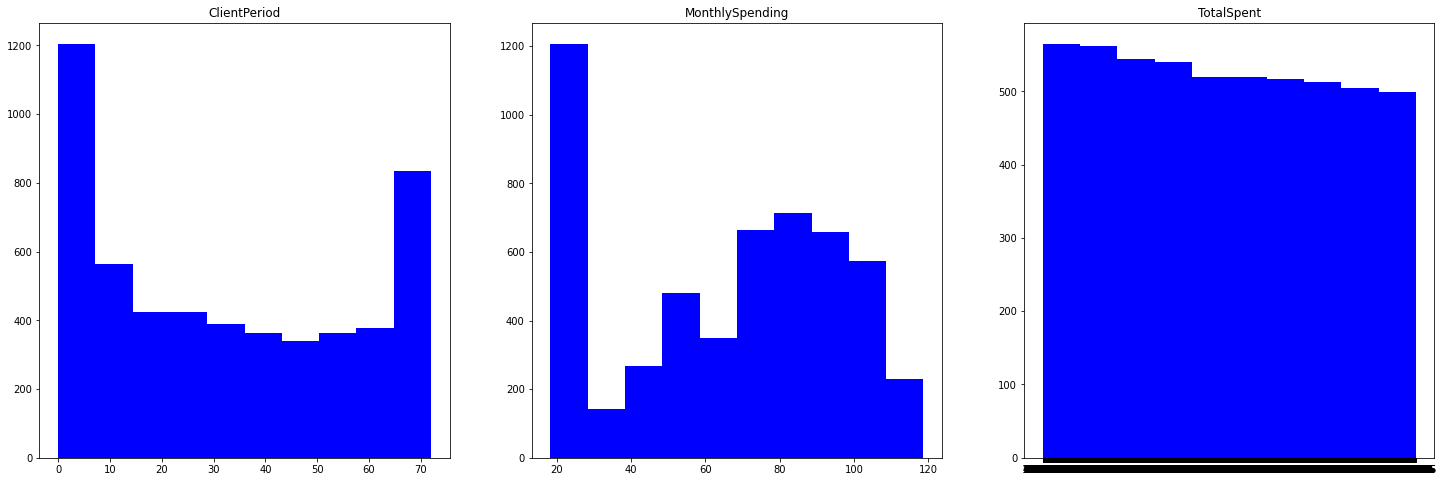

In [10]:
# YOUR CODE
%matplotlib inline 

# Выведем гистограммы численных признаков по отдельности. 
plt.figure(figsize=(25,8))

for i, v in enumerate(num_cols):
  plt.subplot(1, 3, i+1)
  plt.hist(data[num_cols[i]], facecolor='b')
  plt.title(v)
plt.show()

In [11]:
data[cat_cols[6]].value_counts() #.reset_index().iloc[:,0] #Пример работы value_counts()

Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64

In [12]:
for name in cat_cols:
    print(data[name].value_counts())
    print('--------------------------------------')

Male      2655
Female    2627
Name: Sex, dtype: int64
--------------------------------------
0    4440
1     842
Name: IsSeniorCitizen, dtype: int64
--------------------------------------
No     2705
Yes    2577
Name: HasPartner, dtype: int64
--------------------------------------
No     3676
Yes    1606
Name: HasChild, dtype: int64
--------------------------------------
Yes    4761
No      521
Name: HasPhoneService, dtype: int64
--------------------------------------
No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64
--------------------------------------
Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64
--------------------------------------
No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64
--------------------------------------
No                     2332
Yes                    1809
No inte

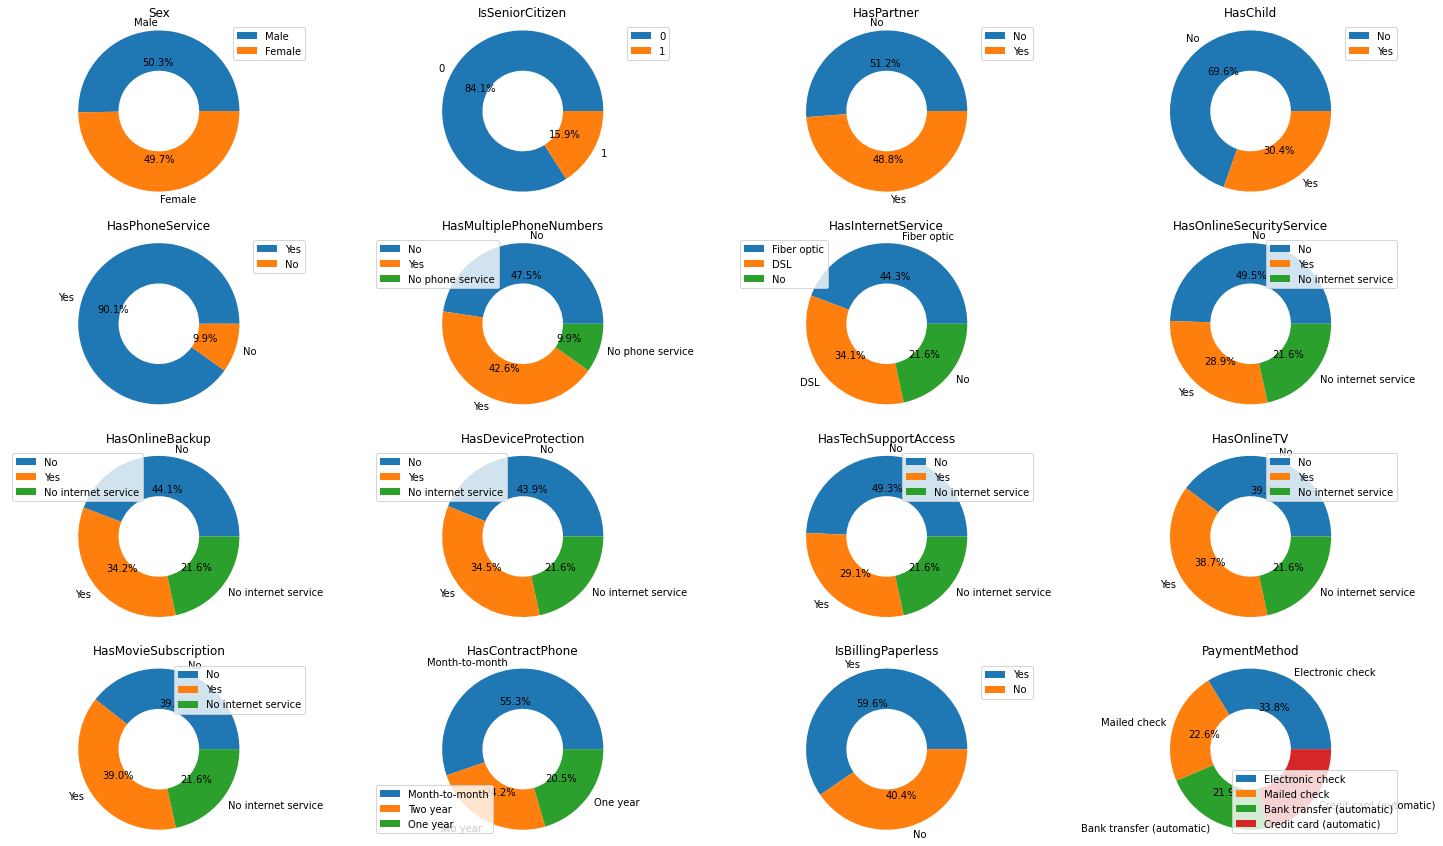

In [13]:
# Круговые диаграммы для категориальных признаков
plt.figure(figsize=(25,15))
for i, v in enumerate(cat_cols):
  plt.subplot(4, 4, i+1)

  plt.pie(data[cat_cols[i]].value_counts(), 
          autopct='%1.1f%%', 
          labels=data[cat_cols[i]].value_counts().reset_index().iloc[:,0], 
          wedgeprops=dict(width=0.5)
          ) 
  # Поясню выражение labels = data[cat_cols[i]].value_counts().reset_index().iloc[:,0] 
  # К объекту Series, образовавшемуся после применения value_counts(), применим reset_index() - получим датафрейм, 
  # потом с помощью iloc[:,0] отбираем нулевой столбец в получившемся датафрейме, т.к. в столбце содержататься значения для легенды
  # С помощью wedgeprops=dict(width=0.5) превращаем круг в бублик
  plt.axis('equal')
  plt.legend()
  plt.title(v)
plt.show()


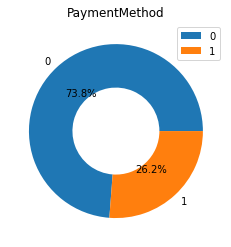

In [14]:
#Взглянем на распределение целевой переменной, и поймем что значений 0 больше чем значений 1 в два с лишним раза
# Следовательно классы в целевой переменной сбалансированы => можно использовать accuracy как метрику
plt.pie(data[target_col].value_counts(), 
        autopct='%1.1f%%', 
        labels=data[target_col].value_counts().reset_index().iloc[:,0], 
        wedgeprops=dict(width=0.5)
        ) 
plt.legend()
plt.title(v)
plt.show()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [15]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

random_state = 12345

In [16]:
# YOUR CODE
# На всякий случай сохраним оригинал фичей
X_origin = data[feature_cols] 
X_origin = X_origin.fillna(0) #Заменим Nan на 0 

# Выделим датафреймы числовых и категориальных данных
numeric_data = data[num_cols]
categorial_data = data[cat_cols]

#В некоторых колонках (в каких точно неизвестно) имеются строковые представления чисел (такие как '2094.65'), преобразуем  их к числовму тип
numeric_data = numeric_data.apply(pd.to_numeric, errors='coerce')

# Для категориальных данных выполним one-hot-encoding 
dummy_features = pd.get_dummies(categorial_data)

#Объединим числовой датафрейм с преобразованным категориальным
X = pd.concat((numeric_data, dummy_features), axis=1)

# Выделим датафрейм таргетов
y = data[target_col]

# Найдем и заместим все Nan.
X = X.fillna(0)
y = y.fillna(0)

X.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.20,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
2,1,75.90,75.90,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,32,79.30,2570.00,1,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
4,60,115.25,6758.45,0,1,0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0


In [17]:
# Используя values на выходе получаем np массив, а иначе получили бы датафреймы.  Попутно перемешали датасет
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)

In [18]:
# Нормируем признаки
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Т.к. target содержит лишь 0 и 1 типа int64 нормировать целевую колонку небудем
y.value_counts()

0    3898
1    1384
Name: Churn, dtype: int64

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
"""
1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. 
(не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).

(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline,
 как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder 
 (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)
"""
scaler = StandardScaler()

X_norm = scaler.fit_transform(X) # отнормируем числовые признаки без дробления на train и test

# Используем кросс-валидацию. Cоздадим модель логистической регрессии
LR = LogisticRegression(solver='saga')

# опишем сетку, по которой будем искать
param_grid = {
    'C': [100, 10, 1, 0.1, 0.01, 0.001],
    'penalty': ['l1', 'l2', 'elasticnet'],
    }

# создадим объект GridSearchCV
search = GridSearchCV(LR, param_grid, n_jobs=-1, cv=5, refit=True, scoring='roc_auc')

search.fit(X_norm, y)

# выведем наилучшие параметры

print('----------------Параметры логистической регрессии:-------------------- ', search.best_params_)
print('----------------Качество ROC_AUC:-------------------- ', search.best_score_)

----------------Параметры логистической регрессии:--------------------  {'C': 10, 'penalty': 'l2'}
----------------Качество ROC_AUC:--------------------  0.8451278933773656


In [23]:
#Попробуем LogisticRegressionCV и разделение на train/valid

from sklearn.metrics import roc_auc_score

LR_cv = LogisticRegressionCV(cv = 5, scoring='roc_auc', penalty = 'l2') # В качестве параметров можно передать явно Cs=[100, 10, 1, 0.1, 0.01, 0.001], но так работает дольше
LR_cv.fit(X_train, y_train)    
 
print('Наилучшие параметры:', LR_cv.scores_)

y_pred = LR_cv.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_pred)
print('ROC_AUC на тесте:', test_auc)

# LogisticRegressionCV быстрее работает, чем GridSearchCV

Наилучшие параметры: {1: array([[0.80622752, 0.81501624, 0.8226955 , 0.82615443, 0.82896073,
        0.82995417, 0.82977289, 0.82953359, 0.82953359, 0.82953359],
       [0.8135442 , 0.82370345, 0.83146972, 0.83249217, 0.83455882,
        0.83574081, 0.83641519, 0.83658197, 0.83657472, 0.83657472],
       [0.8400554 , 0.84651642, 0.8509978 , 0.85376059, 0.85581999,
        0.85558795, 0.85458725, 0.8543552 , 0.85436246, 0.85436246],
       [0.84424672, 0.85265837, 0.85897436, 0.8604464 , 0.86160662,
        0.86236802, 0.8630134 , 0.86329621, 0.86329621, 0.86329621],
       [0.84996674, 0.85725493, 0.86136176, 0.8615859 , 0.86071826,
        0.86032059, 0.86030613, 0.86034228, 0.86033505, 0.86032782]])}
ROC_AUC на тесте: 0.8267424571254421


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

**ROC_AUC = 0.845. С параметрами С=10, penalty = 'l2'**

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [25]:
# YOUR CODE
!pip install catboost #Установим модуль CatBoost от Яндекса

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
import catboost # документация: https://catboost.ai/docs

In [27]:
# CatBoost умеет работать с категориальными признаками сам поэтому не заморачиваемся с категориальными признаками, 
# а численные признаки нормировать для моделей, основанных на деревьях не нужно 
X_train_origin, X_test_origin, y_train, y_test = train_test_split(X_origin.values, y.values, 
                                                       train_size=0.7, 
                                                       random_state=100)

### Эксперименты

In [28]:
# Т.к в Numpy массивах отсутствуют наименования колонок
# создадим массив номеров категориальных признаков, т.е. array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
cat_cols_id = np.arange(3, len(X_origin.columns)) 

boosting_model = catboost.CatBoostClassifier(n_estimators=100, silent=True, # learning_rate': 0.029999999329447743 по умолчанию; silent=True -не показывать промежуточные вычисления
                                             eval_metric='AUC', 
                                             cat_features=cat_cols_id) # Укажем на категориальные признаки


boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

#ROC_AUC на тесте и на трене
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

print(f'ROC_AUC на трейне: {train_auc}')
print(f'ROC_AUC на тесте: {test_auc}')

ROC_AUC на трейне: 0.8670455968112293
ROC_AUC на тесте: 0.8566506032216755


In [29]:
boosting_model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'AUC',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 100,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'max_ctr_complexity': 1,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntro

In [30]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200, eta=0.03,silent=True, #n_estimators - # деревьев; eta - learning rate; silent=True -не показывать промежуточные вычисления
                                             eval_metric='AUC',                     
                                             cat_features=cat_cols_id) # Укажем на категориальные признаки


boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

#ROC_AUC на тесте и на трене
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

print(f'ROC_AUC на трейне: {train_auc}')
print(f'ROC_AUC на тесте: {test_auc}')

ROC_AUC на трейне: 0.8650126955592157
ROC_AUC на тесте: 0.8536481852800432


In [31]:
boosting_model = catboost.CatBoostClassifier(n_estimators=50, eta=0.03,silent=True, #n_estimators - # деревьев; eta - learning rate; silent=True -не показывать промежуточные вычисления
                                             eval_metric='AUC',                     
                                             cat_features=cat_cols_id) # Укажем на категориальные признаки


boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

#ROC_AUC на тесте и на трене
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

print(f'ROC_AUC на трейне: {train_auc}')
print(f'ROC_AUC на тесте: {test_auc}')

ROC_AUC на трейне: 0.8381006963628552
ROC_AUC на тесте: 0.8477254920132102


In [32]:
boosting_model = catboost.CatBoostClassifier(n_estimators=100, eta=0.02,silent=True, #n_estimators - # деревьев; eta - learning rate; silent=True -не показывать промежуточные вычисления
                                             eval_metric='AUC',                     
                                             cat_features=cat_cols_id) # Укажем на категориальные признаки


boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

#ROC_AUC на тесте и на трене
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

print(f'ROC_AUC на трейне: {train_auc}')
print(f'ROC_AUC на тесте: {test_auc}')

ROC_AUC на трейне: 0.8423571009295083
ROC_AUC на тесте: 0.8497790574240076


In [33]:
boosting_model = catboost.CatBoostClassifier(n_estimators=100, eta=0.04,silent=True, #n_estimators - # деревьев; eta - learning rate; silent=True -не показывать промежуточные вычисления
                                             eval_metric='AUC',                     
                                             cat_features=cat_cols_id) # Укажем на категориальные признаки


boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

#ROC_AUC на тесте и на трене
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

print(f'ROC_AUC на трейне: {train_auc}')
print(f'ROC_AUC на тесте: {test_auc}')

ROC_AUC на трейне: 0.8530868538177763
ROC_AUC на тесте: 0.8516851873694143


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

**ROC_AUC на тесте: 0.857 с параметрами n_estimators=100, eta=0.029999999329447743 (по умолчанию)**

# Предсказания

In [34]:
best_model = boosting_model # какая-то предыдущая модель

In [35]:
X_test = pd.read_csv('/content/gdrive/MyDrive/hw_ML_task/test.csv')
submission = pd.read_csv('/content/gdrive/MyDrive/hw_ML_task/submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:,1] #/ best_model.predict(X_test)
submission.to_csv('./my_submission.csv')

In [36]:
submission

,Id,Churn
0,0,0.063976
1,1,0.597478
2,2,0.629909
3,3,0.046910
4,4,0.033614
...,...,...
1756,1756,0.180023
1757,1757,0.045249
1758,1758,0.740546
1759,1759,0.541446


**kaggle: Атахан_Алчымбаев roc-auc > 0.84**


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.